# Linear Regression on NBA Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf  # Using formula API

In [2]:
nba = pd.read_csv('../data/nba_train.csv')

In [3]:
nba.head()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,13,75,2038,2645,1369,2406,1913,782,539,1495
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,162,422,1907,2449,1227,2457,2198,809,308,1539
2,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,70,275,2019,2592,1115,2465,2152,704,392,1684
3,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,36,187,1702,2205,1307,2381,2108,764,342,1370
4,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,83,255,1871,2539,1311,2524,2079,746,404,1533


**Data metadata:**

- SeasonEnd: Season year
- Team
- Playoffs: whether or not team made it to the playoffs
- W: Number of games won
- PTS: Total points scored
- oppPTS: Total points opponents scored against the team
- FG: Field goals made
- FGA: Field goal attemtps
- 2P: 2-point field goals made
- 2PA: 2-point field goal attempts
- 3P: 3-point field goals made
- 3PA: 3-point field goal attempts
- FT: Free-throws made
- FTA: Free-throw attempts
- ORB: Offensive rebounds made
- DRB: Defensive rebounds made
- AST: # of assists
- STL: # of steals
- BLK: # of blocks
- TOV: # of turnovers

In [5]:
corr = nba.corr()

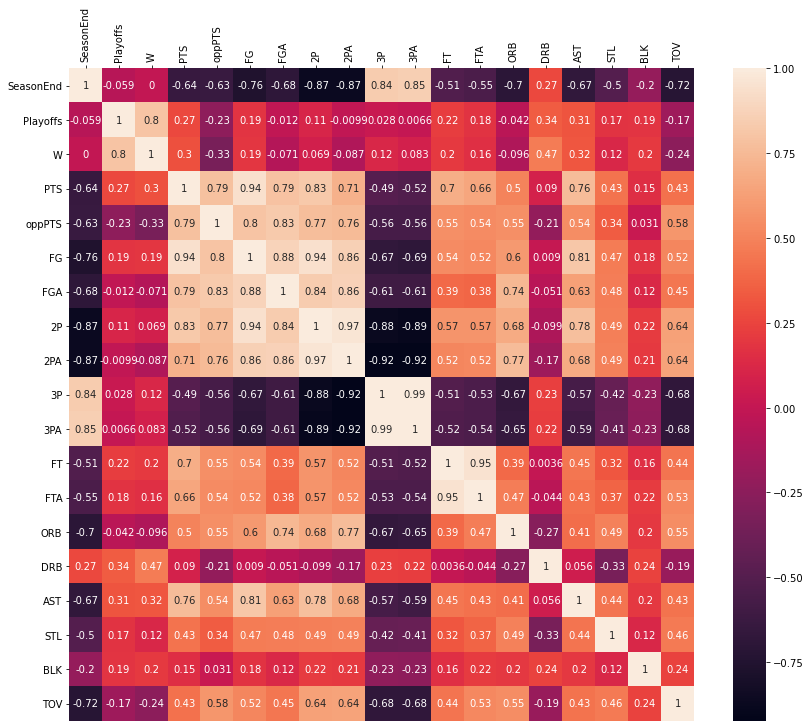

In [9]:
fig, ax = plt.subplots(figsize=(14,12))
ax.xaxis.set_ticks_position('top')
sns.heatmap(data=corr, annot=True);

**Question:** At minimum, about how many games does the team needs to win to make it to the playoffs?

Let's create a pivot table where the rows (index) is number of wins (W) and column is the ```Playoffs``` column and then perform a count on ```Team```.

In [15]:
nba.pivot_table(index='W', columns='Playoffs', values='Team', aggfunc='count').fillna(0)

Playoffs,0,1
W,,
11,2.0,0.0
12,2.0,0.0
13,2.0,0.0
14,2.0,0.0
15,10.0,0.0
16,2.0,0.0
17,11.0,0.0
18,5.0,0.0
19,10.0,0.0


From above, we see that if a team wins at least 35 games, you will start to increase your chance of getting into the playoffs.  But when you win at least 47 games, you will almost always reach the playoffs.

For a more visual representation of wins vs playoff outcome, we can use seaborn's stripplot:

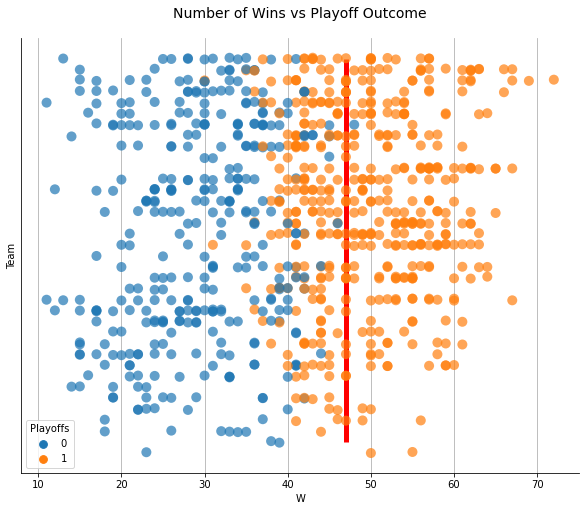

In [49]:
fig, ax = plt.subplots(figsize=(10,8))
(sns.stripplot(x="W",
             y="Team",
             hue="Playoffs",
             data=nba,
             alpha=0.7,
             s=10,
             ax=ax,
            )
).set_yticks([])
plt.vlines(x=47, ymin=0, ymax=35, color='red', linewidth=5)    # Create vertical line@x=47
plt.title("Number of Wins vs Playoff Outcome", pad=20, fontsize=14)
plt.grid(True)
sns.despine()